In [41]:
# from __future__ import print_function, division

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [43]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [44]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [45]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
x = np.arange(0.0,2*np.pi,0.01)
y=np.sin(x)

In [46]:
integrate(y,0.01)

-1.0853464615831545e-05

In [47]:
np.trapz(y, dx=0.01)

5.073044348824496e-06

In [48]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
y2 = np.sin(np.arange(0.0,6*np.pi,0.01))
dy2 = np.diff(y2) ## changes in y
dy_sign=np.sign(dy2) ## signs of changes -> outputs an array of -1 , 0 and 1
maxmin = np.diff(dy_sign) ##finds the points where the sign of change changes (outputs 0 if subsequent values have the same sign)
## in maxmin value is positive if the derivative changes from negative to positive = if it's a min, and vice versa
mins = np.asarray(np.nonzero(maxmin > 0)) #indices of mins
mins = mins/100 #values of mins
maxs = np.asarray(np.nonzero(maxmin < 0)) #indices of maxs
maxs = maxs/100 #values of maxs

print(mins)
print(maxs)

[[ 4.7  10.99 17.27]]
[[ 1.56  7.84 14.13]]


# Part 2

In [49]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [50]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [59]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)
    low_pass_filter = np.ones(y_fft.shape)
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    y_fft = y_fft*low_pass_filter
    y_clean_values = np.fft.irfft(y_fft, len(y_values))
    return y_clean_values

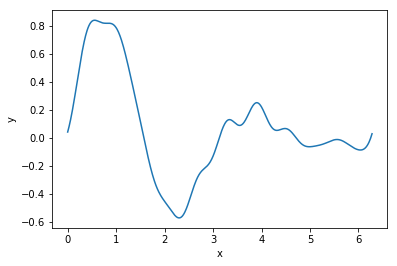

In [63]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
packet = noisy_packet(x, 2, 2, 0.2)
plot_fn(x,clean_data(x,packet))

# Part 3

In [15]:
# TODO mask the arrays, then plot

In [16]:
# TODO try to generate masked noisy data and then clean it